<a href="https://colab.research.google.com/github/Morsalina/ML-project--Sentiment-Classifier/blob/main/Sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -qq google-play-scraper

     |████████████████████████████████| 52 kB 1.1 MB/s 


In [ ]:
!pip install -qq -U watermark

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 2.1.3 which is incompatible.


In [ ]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

pandas             : 1.3.5
matplotlib         : 3.2.2
seaborn            : 0.11.2
google_play_scraper: 1.0.3



In [ ]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [ ]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

#app ids are specified to select a particular app

In [ ]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 15/15 [00:03<00:00,  4.27it/s]


In [ ]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support

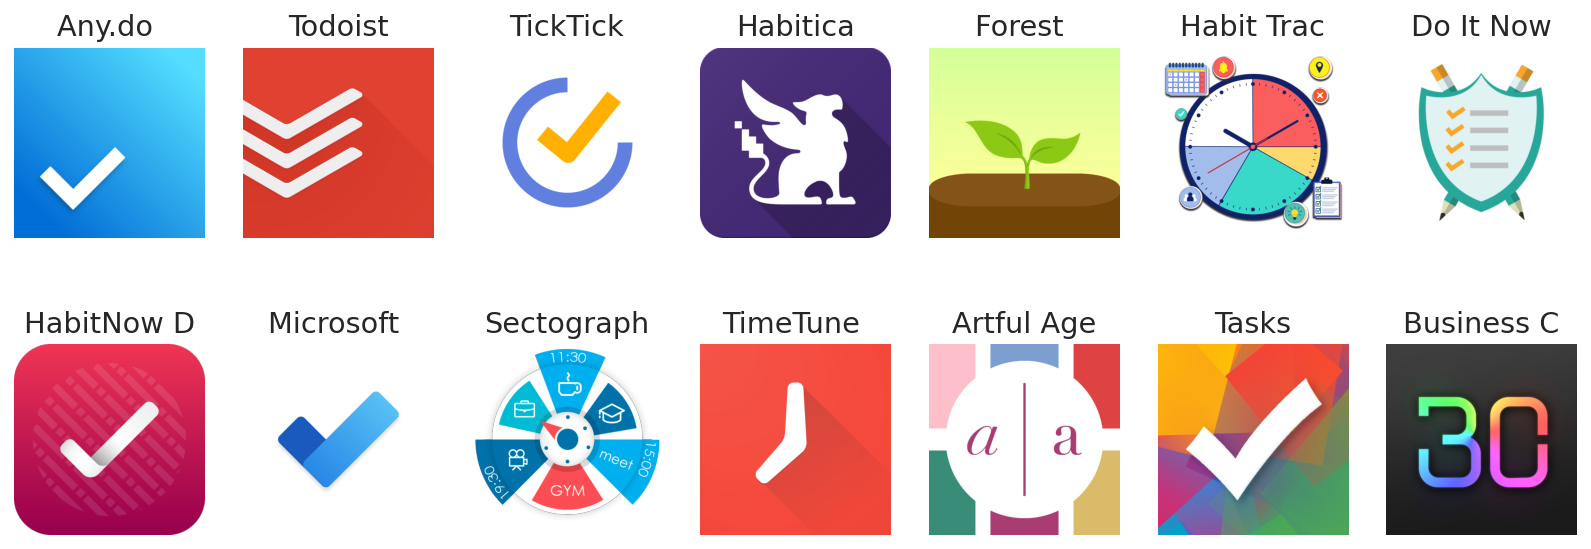

In [ ]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [ ]:
app_infos_df = pd.DataFrame(app_infos)  #creating pandas dataframe from json file
app_infos_df.to_csv('apps.csv', index=None, header=True) # saving the dataframe as csv file

In [ ]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 15/15 [00:55<00:00,  3.67s/it]


In [ ]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "at": "2022-04-25 15:55:21",
  "content": "I used to love this app. I have used it for years. I even had (until yesterday) the paid version. I primarily use this app to sync up my alexa tasks. It started having issues, then got fixed. Now the company is saying that Amazon sync is no longer usable (unless you want to add a 3rd party to allow it access to your Amazon account).",
  "repliedAt": "2022-04-26 16:53:39",
  "replyContent": "Unfortunately, Amazon has rejected our fix and will not be reopening the Any.do Skill just yet.\nAt this point in time, our efforts seem to be blocked and we will not be able to offer with any estimate to when the integration will be reactivated :(",
  "reviewCreatedVersion": "5.15.4.2",
  "reviewId": "gp:AOqpTOETV_gyK_4K53K_0hip-ofKkumdJlGwWUBestuc2C_oLqjFdhRj5E40paAyMwaeTXyfcvUm-I2XFcmvoQ",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 6,
  "userImage": "https://play-lh.googleusercontent.com/a/AATXAJzFdtk_ASx

In [ ]:
len(app_reviews)

17108

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

In [ ]:
!pip -q install transformers

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.6 MB 39.7 MB/s 
     |████████████████████████████████| 880 kB 41.9 MB/s 
     |████████████████████████████████| 77 kB 5.6 MB/s 
     |████████████████████████████████| 596 kB 43.9 MB/s 


In [ ]:
import transformers
import torch

import copy
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.model_selection import train_test_split
from tqdm import tqdm

from torch import nn, optim
from torch.utils import data
from torch.utils.data import Dataset, DataLoader

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 8, 6
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
!gdown --id 1RuKtnbCdEW3sE5ul7Zn-0xEaq5w8IlLI

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1RuKtnbCdEW3sE5ul7Zn-0xEaq5w8IlLI
To: /content/apps.csv
100% 139k/139k [00:00<00:00, 62.9MB/s]


In [ ]:
!gdown --id 1rfDGHKfxHX7Ww2rXfqUwCWQ0_fgIXNFK

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rfDGHKfxHX7Ww2rXfqUwCWQ0_fgIXNFK
To: /content/reviews.csv
100% 10.4M/10.4M [00:00<00:00, 13.7MB/s]


In [ ]:
df = pd.read_csv("reviews.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOFpvQ2kFHECeR8xK4kZWZd91wUpWHQCnXp0nz-...,Kenneth-Raymond Cox,https://play-lh.googleusercontent.com/a-/AOh14...,I wanted a simple to-do list to put on my home...,1,84,5.15.4.2,2022-03-25 08:13:20,Any.do is a free app. 90% of the app is comple...,2022-03-28 08:31:27,most_relevant,com.anydo
1,gp:AOqpTOG-nGuDe0w6if400pTvNJnK3MlfnEcJLIB84aR...,Ben Maybe,https://play-lh.googleusercontent.com/a/AATXAJ...,But the paid version for a year and never succ...,1,48,5.15.4.2,2022-03-01 17:18:50,"Hi, we're sorry to hear you're experiencing is...",2022-03-01 15:53:58,most_relevant,com.anydo
2,gp:AOqpTOH85sc18Ajgcgj6-IGmA7Gp34fVsrbyBJ274IZ...,Anthony Duarte,https://play-lh.googleusercontent.com/a-/AOh14...,"As a programmer, this is absolutely the most l...",1,73,5.15.3.0,2022-01-22 11:33:48,We are sorry you feel this way! We encourage u...,2022-01-24 09:59:17,most_relevant,com.anydo
3,gp:AOqpTOGxyMqOStnhbQ_mLfnLUfd1DHAt5uRXqDNArML...,Anthony Cannon,https://play-lh.googleusercontent.com/a/AATXAJ...,Redoing my review after messaging with the app...,1,79,5.15.3.0,2022-01-22 13:34:47,"Any.do is a free app, 90% of the app is comple...",2022-01-24 09:58:12,most_relevant,com.anydo
4,gp:AOqpTOG2AXuKqrR8FIN43a5BGZY4Iha5SFQZZ6o9vOR...,ChuCannon,https://play-lh.googleusercontent.com/a/AATXAJ...,"Works decently most of the time, but I've noti...",1,40,5.15.2.2,2021-11-18 17:05:38,"Hi, we're sorry to hear you're experiencing is...",2021-11-21 14:48:23,most_relevant,com.anydo


In [ ]:
df.shape

(17102, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17102 entries, 0 to 17101
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              17102 non-null  object
 1   userName              17102 non-null  object
 2   userImage             17102 non-null  object
 3   content               17102 non-null  object
 4   score                 17102 non-null  int64 
 5   thumbsUpCount         17102 non-null  int64 
 6   reviewCreatedVersion  14444 non-null  object
 7   at                    17102 non-null  object
 8   replyContent          9114 non-null   object
 9   repliedAt             9114 non-null   object
 10  sortOrder             17102 non-null  object
 11  appId                 17102 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.6+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


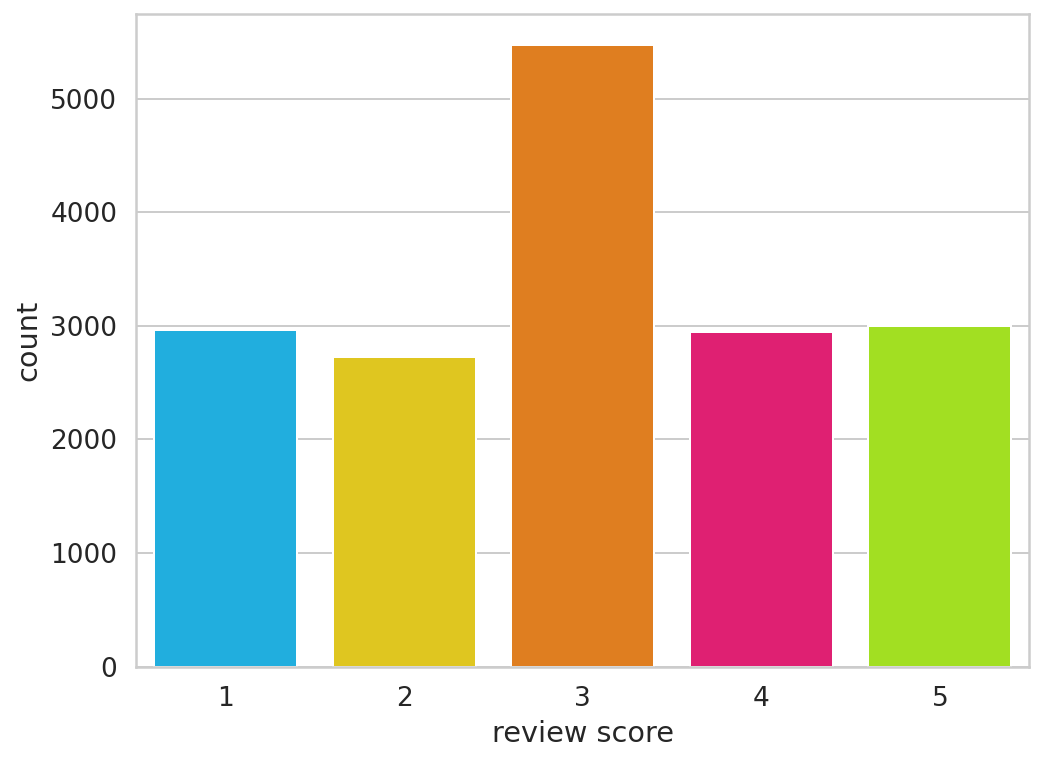

In [ ]:
sns.countplot(df.score)
plt.xlabel('review score'); #viewing the score to check if the dataset is balanced

#score 1,2 -> negative
#score 4,5 -> positive
#score 3 -> neutral

In [ ]:
# 0 -> negative sentiment
# 1 -> neutral
# 2 -> positive sentiment'

def to_sentiment(ratings):
    rating = int(ratings)
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

In [ ]:
# now create a column (output class)

df['sentiment'] = df.score.apply(to_sentiment) 

In [ ]:
class_names = ['negative', 'neutral', 'positive']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


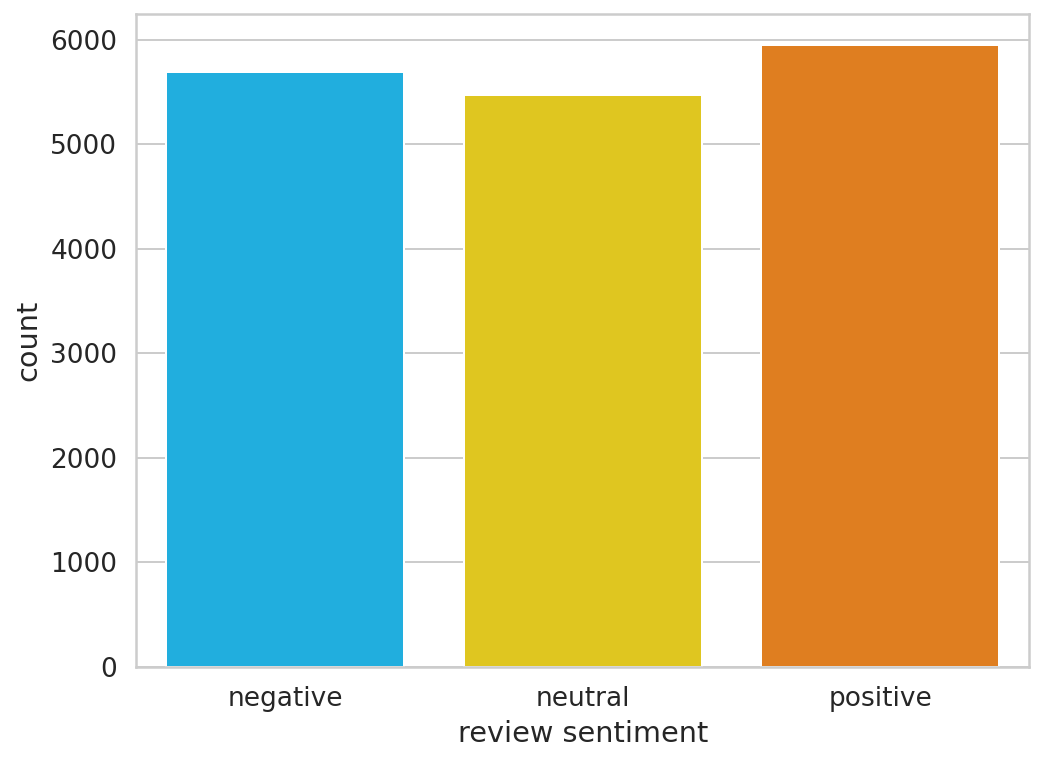

In [ ]:
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

#Data preprocessing

In [ ]:
# we will be using pre-trained tokenizer provided by huggingface

PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = transformers.BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)


Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# now I am showing how tokenizer helps creating tokens in a sentence so that bert can understand

simple_text = 'When was I last outside? I am stucked at home for last two weeks. '
tokens = tokenizer.tokenize(simple_text)

In [ ]:
tokens

['When',
 'was',
 'I',
 'last',
 'outside',
 '?',
 'I',
 'am',
 'stuck',
 '##ed',
 'at',
 'home',
 'for',
 'last',
 'two',
 'weeks',
 '.']

In [ ]:
# each tokens will have id's and these ids will be fed to bert model as models don't understand text.
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [ ]:
print(token_ids)

[1332, 1108, 146, 1314, 1796, 136, 146, 1821, 5342, 1174, 1120, 1313, 1111, 1314, 1160, 2277, 119]


In [ ]:
# printing for better undrstanding

print(f'Sentence : {simple_text}')
print(f'Tokens : {tokens}')
print(f'Token ID : {token_ids}')

Sentence : When was I last outside? I am stucked at home for last two weeks. 
Tokens : ['When', 'was', 'I', 'last', 'outside', '?', 'I', 'am', 'stuck', '##ed', 'at', 'home', 'for', 'last', 'two', 'weeks', '.']
Token ID : [1332, 1108, 146, 1314, 1796, 136, 146, 1821, 5342, 1174, 1120, 1313, 1111, 1314, 1160, 2277, 119]


###Special Tokens:
This token is need for masking where the sentence ends (separation token), classification tokens, the bert model was trained like this.

In [ ]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [ ]:
#classification token : we must add this token to the start of each sentence, so BERT knows we're doing classification
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

In [ ]:
# padding_token
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [ ]:
# unknown token : if any word is unknown to the model
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

In [ ]:
# we can use these special token together using encode_plus()

encoding = tokenizer.encode_plus(
    simple_text,
    max_length= 32,
    truncation=True,
    add_special_tokens = True,
    padding='max_length',
    return_attention_mask = True,
    return_token_type_ids = False,
    return_tensors = 'pt'

)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [ ]:
encoding['input_ids']

# 0s were padded to make the input length 32(max_len)

tensor([[ 101, 1332, 1108,  146, 1314, 1796,  136,  146, 1821, 5342, 1174, 1120,
         1313, 1111, 1314, 1160, 2277,  119,  102,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])

In [ ]:
# in case of attention mask, 1 : words are there
#                             0 : 0s are padded

encoding['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

### choosing sequence's max_length
BERT works with fixed-length sequences. We'll use a simple strategy to choose the max length. Let's store the token length of each review:
512 is the max length for BERT

In [ ]:
token_lens = []

for txt in df.content:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


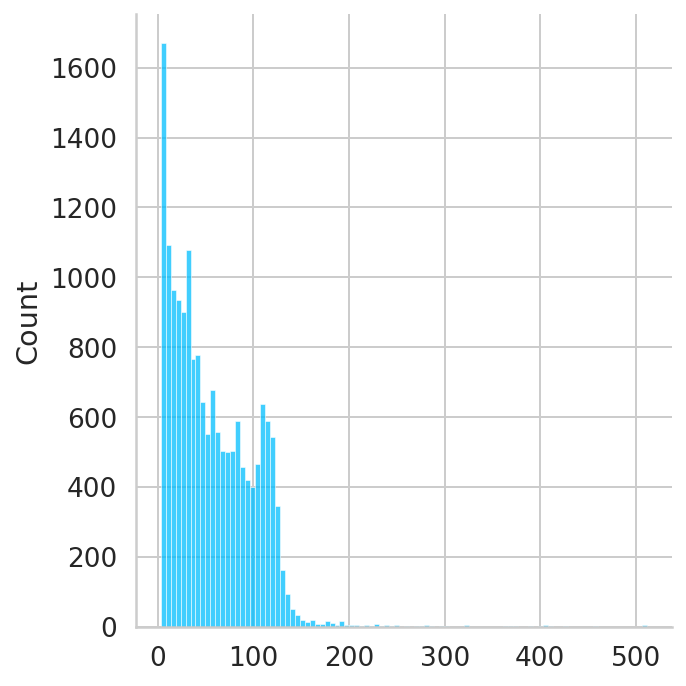

In [ ]:
# plotting the graph
sns.displot(token_lens)
# plt.xlim([0, 256]);
# plt.xlabel('Token count');

from the graph, we can see most of the text is max 200 words long

### create a pytorch dataset

In [ ]:
class GooglePlayReviewDataset(Dataset):
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        encoding = self.tokenizer.encode_plus(
            review,
            max_length= self.max_len,
            truncation=True,
            add_special_tokens = True,
            padding='max_length',
            return_attention_mask = True,
            return_tensors = 'pt'
        )
        return{
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets' : torch.tensor(self.targets[item], dtype = torch.long)
        }

In [ ]:
MAX_LEN = 256
Epoch = 10
BATCH_SIZE = 16


###Splitting

In [ ]:
# splitting the dataset into test,validation and train
df_train, df_test = train_test_split(df, test_size= 0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size= 0.5, random_state=RANDOM_SEED)

In [ ]:
df_train.shape

(13681, 13)

In [ ]:
df_test.shape, df_val.shape

((1711, 13), (1710, 13))

In [ ]:
df.keys()

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId', 'sentiment'],
      dtype='object')

In [ ]:
# create dataLoader

def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GooglePlayReviewDataset(
    reviews=df.content.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len 
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    drop_last = True,
    shuffle = True,
    num_workers=2
  )

In [ ]:
# creating train, test, validation dataLoader

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)


In [ ]:
#Let's have a look at an example batch from our training data loader
dataset = next(iter(train_data_loader))
dataset.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(dataset['input_ids'].shape)

torch.Size([16, 256])


In [ ]:
print(dataset['targets'].shape)

torch.Size([16])


###Loading BERT using huggingface library

In [ ]:
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# now we are calling bert model and this will return the last hidden stage of bert model and polled output

last_hidden_state, polled_output = bert_model(input_ids=encoding['input_ids'], attention_mask = encoding['attention_mask'])

In [ ]:
# bert model uses 768 hidden units
bert_model.config.hidden_size

768

###Sentiment Classifier

In [ ]:
# class SentimentClassifier(nn.Module):
#     def __init__(self, n_classes):
#         super(SentimentClassifier, self).__init__()
#         self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
#         self.drop = nn.Dropout(p = 0.2)
#         self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
#         self.softmax = nn.Softmax(dim = 1)

#     def forward(self, input_ids, attention_mask):
#         _, polled_output = self.bert(input_ids = input_ids, attention_mask = attention_mask)
#         output = self.drop(polled_output)
#         output = self.out(output)
#         return self.softmax(output)

class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME,  return_dict=False)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentimentClassifier(len(class_names))
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#now look at the sample data
input_ids = dataset['input_ids'].to(device)
attention_mask = dataset['attention_mask'].to(device)
print(input_ids.shape)
print(attention_mask.shape)

torch.Size([16, 256])
torch.Size([16, 256])


In [ ]:

# now run the model and see how it performs
print(input_ids.dtype)
model(input_ids, attention_mask)

torch.int64


tensor([[ 0.6651,  0.4942, -0.1507],
        [ 0.5480,  0.2652,  0.1628],
        [ 0.5332,  0.4892,  0.2060],
        [ 0.5160,  0.1091, -0.2963],
        [ 0.7263,  0.4420,  0.2885],
        [ 0.3155,  0.4439, -0.0437],
        [ 0.4343,  0.5224, -0.6634],
        [ 0.2747,  0.6611,  0.0079],
        [ 0.4009,  0.1999,  0.0060],
        [ 0.4000,  0.3976, -0.1008],
        [ 0.7878,  0.2752,  0.0673],
        [ 0.7105,  0.5900, -0.4026],
        [ 0.1779, -0.0235, -0.3551],
        [ 0.5425,  0.2092, -0.4933],
        [ 0.7852,  0.1853,  0.0520],
        [ 1.0536,  0.8802, -1.1401]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

###now train the model

In [ ]:
optimizer = AdamW(model.parameters(), lr = 2e-5, correct_bias = False, no_deprecation_warning=True)

total_steps = len(train_data_loader)*Epoch

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = 0,
    num_training_steps = total_steps

)

loss_func = nn.CrossEntropyLoss().to(device)

In [ ]:
#train epoch helper method

def train_epoch(model, data_loader, loss_func, scheduler, device, optimizer, num_examples):
    #put the model in train mood -> batch normalization, dropout is enabled
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d['input_ids'].to(device)
        attention_mask = d['attention_mask'].to(device)
        targets = d['targets'].to(device)
        outputs = model(
            input_ids = input_ids,
            attention_mask = attention_mask
        )
        # we will take the max prediction along dim 1
        _, preds = torch.max(outputs, dim = 1)
        loss = loss_func(outputs , targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        #backprop

        loss.backward()
        #gradient clipping -> solves exploiding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), max_norm = 1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double()/num_examples, np.mean(losses)




In [ ]:
# create a val epoch helper function

def eval_epoch(model, data_loader, loss_func, device, num_examples):
    #put the model in eval mood -> batch normalization, dropout is disabled
    model = model.eval()

    losses = []
    correct_predictions = 0

    #disable the gradient descent so that model can run faster
    with torch.no_grad():
        for d in data_loader:
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            targets = d['targets'].to(device)
            outputs = model(
                input_ids = input_ids,
                attention_mask = attention_mask
            )
            # we will take the max prediction along dim 1
            _, preds = torch.max(outputs, dim = 1)
            loss = loss_func(outputs , targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

        # no training is required
    return correct_predictions.double()/num_examples, np.mean(losses)
        


In [ ]:
%%time
from collections import defaultdict
from typing import DefaultDict
# see the accuracy, loss


history = defaultdict(list)
best_accuracy = 0

for epoch in range(Epoch):
    print(f'Epoch {epoch + 1}/ {Epoch}')
    print('-'*15)

    train_accuracy, train_loss = train_epoch(model, train_data_loader, loss_func, scheduler, device, optimizer, len(df_train))
    print(f'Train loss {train_loss} train accuracy {train_accuracy}')

    val_accuracy, val_loss = eval_epoch(model, val_data_loader, loss_func, device, len(df_val))
    print(f'validation loss {val_loss} validation accuracy {val_accuracy}')
    print()


    history['train_accuracy'].append(train_accuracy)
    history['train_loss'].append(train_loss)

    history['val_accuracy'].append(val_accuracy)
    history['val_loss'].append(val_loss)

    if val_accuracy > best_accuracy:
        torch.save(model.state_dict(), '/content/drive/My Drive/6th semester/CSE 4610 Design Project/best_model_state.bin')
        best_accuracy = val_accuracy

   

Epoch 1/ 10
---------------
Train loss 0.7526662637964326 train accuracy 0.6603318470872012
validation loss 0.6526239563552838 validation accuracy 0.7058479532163743

Epoch 2/ 10
---------------
Train loss 0.4789628125683606 train accuracy 0.8136832102916454
validation loss 0.5774767471934265 validation accuracy 0.7555555555555555

Epoch 3/ 10
---------------
Train loss 0.2816256936334553 train accuracy 0.9030772604341788
validation loss 0.678702571253591 validation accuracy 0.7871345029239766

Epoch 4/ 10
---------------
Train loss 0.18210076286718904 train accuracy 0.9445215992982969
validation loss 0.8874946536983908 validation accuracy 0.7953216374269007

Epoch 5/ 10
---------------
Train loss 0.12876789571039313 train accuracy 0.9622834588114904
validation loss 1.0697730886618133 validation accuracy 0.8035087719298246

Epoch 6/ 10
---------------
Train loss 0.08986776555562936 train accuracy 0.9737592281265989
validation loss 1.186774178389416 validation accuracy 0.803508771929824

### Download and load the model 

In [ ]:
!gdown --id 1b8UEmZuHtnHoqZdomxSHFz2Z48l3AnZy

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1b8UEmZuHtnHoqZdomxSHFz2Z48l3AnZy
To: /content/best_model_state.bin
100% 433M/433M [00:01<00:00, 236MB/s]


In [ ]:
model = SentimentClassifier(len(class_names))
model.load_state_dict(torch.load('best_model_state.bin'))
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Evaluation

In [ ]:
print(best_accuracy)

NameError: ignored

In [ ]:
def get_predictions(model, data_loader):
    model = model.eval()
  
    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["review_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu() # converts list of tensors into single tensor
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return review_texts, predictions, prediction_probs, real_values


In [ ]:
test_accuracy, test_loss = eval_epoch(model, test_data_loader, loss_func, device, len(df_test))
test_accuracy

tensor(0.7797, device='cuda:0', dtype=torch.float64)

In [ ]:
y_review_texts, y_predictions, y_prediction_probs, y_test = get_predictions(model, test_data_loader)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predictions, target_names = class_names))

              precision    recall  f1-score   support

    negative       0.84      0.81      0.82       571
     neutral       0.67      0.75      0.71       532
    positive       0.87      0.80      0.83       593

    accuracy                           0.79      1696
   macro avg       0.79      0.79      0.79      1696
weighted avg       0.80      0.79      0.79      1696



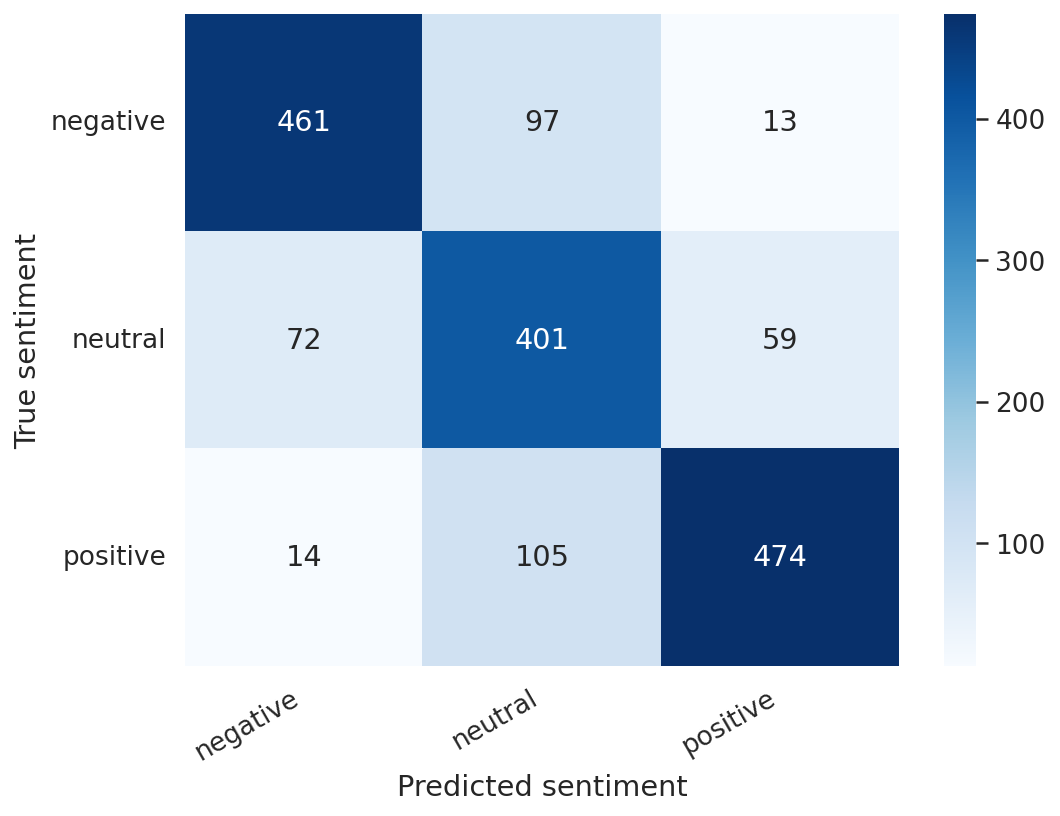

In [ ]:
# confusion matrix

def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_predictions)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
from textwrap import wrap



In [ ]:
# selecting a random review and analysis of its true sentiment
idx = 3

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_prediction_probs[idx]
})

In [ ]:
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {class_names[true_sentiment]}')

Very good app. I'd like it more if I could reposition subtasks up and
down within a list's tasks. Also, it would be more helpful if tasks
had start and end dates rather than only due date. Finally, it would
be useful to be able to cancel tasks instead of just complete them or
delete them. A deleted task is as if it never happened. A completed
task looks done, even though it was actually canceled.

True sentiment: positive


(0.0, 1.0)

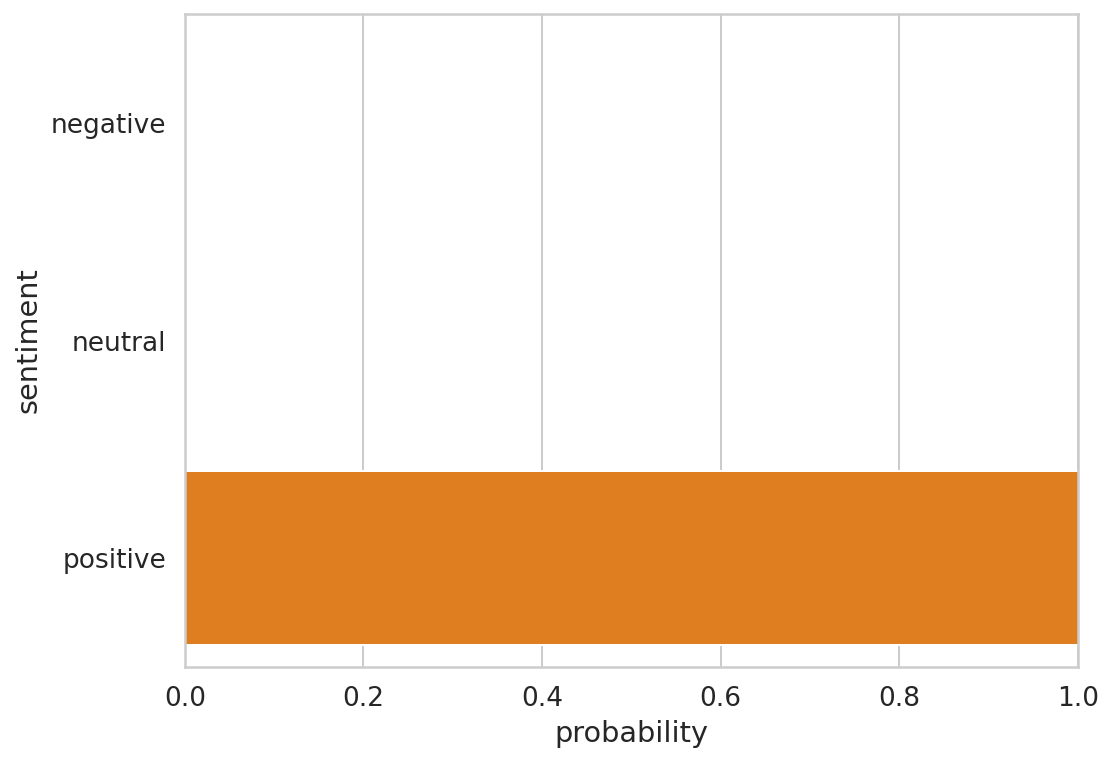

In [ ]:
# now test this review with our model 

sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1])

Our model can classify this review correctly

### Now we will predict sentiment from raw data

In [ ]:
review_text = "I love completing my todos! Best app ever!!!"
#review_text = "This app shows contact number of each person which is really bad as not everyone wants to show their phone number. "
#review_text = "Not going to comment anything "


# we now to encode this text with tokenizer
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  #pad_to_max_length=True,
  padding='max_length',
  return_attention_mask=True,
  return_tensors='pt',
)


In [ ]:
# now we have the input_ids and attention_masks

input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

In [ ]:
# now call our model to get output

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

In [ ]:
print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

Review text: I love completing my todos! Best app ever!!!
Sentiment  : positive
